In [10]:
import pandas as pd
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../../traces/workload_traces/workloads.csv')
df = df[df['platform'] == 'platform-0']
df.head()

,dataset,family,algorithm,platform,run,duration,schedulerDelay,executorRunTime,executorCpuTime,executorDeserializeTime,...,peakExecutionMemory,bytesRead,shuffleFetchWaitTime,shuffleTotalBytesRead,shuffleTotalBlocksFetched,shuffleLocalBlocksFetched,shuffleRemoteBlocksFetched,shuffleWriteTime,shuffleBytesWritten,fitTime
25,DHG,clustering,BKM,platform-0,0,17659195,128151,17384950,11387091,145831,...,167220911,184898948086,11,4147111,6880,172,6708,1225,4147111,154268.0
86,DHG,clustering,KM,platform-0,0,2460043,166627,2144081,1271561,148948,...,166841115,93470581548,17,3325656,8000,200,7800,1557,3325656,23986.0
147,DHG,clustering,GMM,platform-0,0,3978738,65534,3811085,2722073,101836,...,187344416,71467580940,65,22957409,3360,88,3272,1382,22957409,41089.0
208,DHG,classification,MLP,platform-0,0,28939205,230008,28464293,27159748,244315,...,11525196032,222962779362,1087,439793063,18080,442,17638,426,439793063,201822.0
269,DHG,classification,DT,platform-0,0,4076430,84125,3890030,2411518,101949,...,46499059786,48354541616,16113,483366273,96480,2412,94068,2941,483366273,37718.0


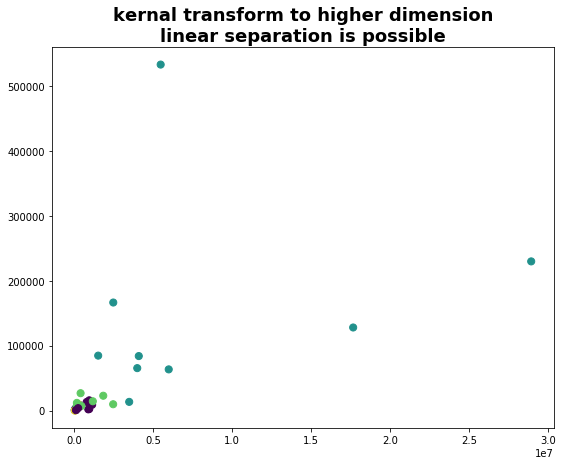

In [55]:
features = list(df.columns)[5:]
x = df.loc[:, features]

model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',assign_labels='kmeans')

labelsS = model.fit_predict(x)
cmap = 'viridis'
dot_size=50

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('kernal transform to higher dimension\nlinear separation is possible', fontsize=18, fontweight='demi')
plt.scatter(x.values[:, 0], x.values[:, 1], c=labelsS, s=dot_size, cmap=cmap)
#sns.scatterplot(x[:,0], x[:, 1])

In [53]:
x['workload'] = list(df.dataset + df.algorithm)
x['cluster'] = labelsS

In [54]:
for i in set(labelsS):
    print(i)
    print(x[x.cluster == i]['workload'])

0
940     DGSGBT
1001    DGSRFR
1794    DDFMLP
1855     DDFDT
1977    DDFGBT
2038    DDFRFR
2099     DDFLR
2343     DDRDT
2526    DDRRFR
2587     DDRLR
Name: workload, dtype: object
1
635      DGSKM
818      DGSDT
1062     DGSLR
1123    DSSBKM
1184     DSSKM
1245    DSSGMM
1367     DSSDT
1428    DSSBLR
1550    DSSRFR
1611     DSSLR
1733     DDFKM
Name: workload, dtype: object
2
25      DHGBKM
86       DHGKM
147     DHGGMM
208     DHGMLP
269      DHGDT
330     DHGBLR
391     DHGGBT
452     DHGRFR
513      DHGLR
2282    DDRMLP
Name: workload, dtype: object
3
574     DGSBKM
696     DGSGMM
757     DGSMLP
879     DGSBLR
1306    DSSMLP
1489    DSSGBT
1672    DDFBKM
1916    DDFBLR
2160    DDRBKM
2221     DDRKM
2404    DDRBLR
2465    DDRGBT
Name: workload, dtype: object


In [ ]:
model.